In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import shutil

# ==================== CONFIG ====================
ANNOTATION_FILES = {
    'train': r'C:\Users\anura\Desktop\Img_Pro\_annotations_train.csv',
    'val': r'_C:\Users\anura\Desktop\Img_Pro\_annotations_valid.csv',
    'test': r'C:\Users\anura\Desktop\Img_Pro\_annotations_test.csv'
}
SOURCE_DIR = r'C:\Users\anura\Desktop\Img_Pro\train_balanced'
OUTPUT_DIR = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset'
IMAGE_SIZE = (128, 128)

# Remove existing dataset
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [2]:
import cv2
import numpy as np

def segment_and_crop(image, x_min, y_min, x_max, y_max):
    # Validate and clip coordinates
    x_min, x_max = min(x_min, x_max), max(x_min, x_max)
    y_min, y_max = min(y_min, y_max), max(y_min, y_max)
    
    h, w = image.shape[:2]
    x_min, x_max = max(0, x_min), min(w, x_max)
    y_min, y_max = max(0, y_min), min(h, y_max)
    
    if x_max <= x_min or y_max <= y_min:
        return None  # Invalid region

    # Crop the region
    crop = image[y_min:y_max, x_min:x_max]

    # Convert to grayscale (if needed)
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

    # Optional: Light contrast enhancement
    equalized = cv2.equalizeHist(gray)

    # Light erosion + dilation to reduce speckle noise
    kernel = np.ones((2, 2), np.uint8)
    processed = cv2.erode(equalized, kernel, iterations=1)
    processed = cv2.dilate(processed, kernel, iterations=1)

    # Optional: Mild Sobel edge enhancement
    sobelx = cv2.Sobel(processed, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(processed, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = cv2.magnitude(sobelx, sobely)
    sobel_mag = np.uint8(np.clip(sobel_mag, 0, 255))

    # Stack to 3 channels if needed (for CNN input)
    result = cv2.merge([sobel_mag] * 3)

    return result
df = pd.read_csv(r'C:\Users\anura\Desktop\Img_Pro\_annotations_train.csv')
# In your processing loop:
for _, row in tqdm(df.iterrows(), total=len(df)):
    try:
        filename = row['filename']
        label = row['class']
        x_min, y_min, x_max, y_max = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        
        image_path = os.path.join(SOURCE_DIR, label, filename)
        image = cv2.imread(image_path)
        
        if image is None:
            # print(f"Skipped {filename} (not found)")
            continue
            
        processed = segment_and_crop(image, x_min, y_min, x_max, y_max)
        if processed is None:
            # print(f"Skipped {filename} (invalid coordinates)")
            continue
            
        processed = cv2.resize(processed, IMAGE_SIZE)
        save_path = os.path.join(OUTPUT_DIR, 'train', label) 
        os.makedirs(save_path, exist_ok=True)
        cv2.imwrite(os.path.join(save_path, filename), processed)
        
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

  0%|          | 0/32036 [00:00<?, ?it/s]

100%|██████████| 32036/32036 [06:27<00:00, 82.73it/s] 


In [13]:
def crop(image, x_min, y_min, x_max, y_max):
    # Validate coordinates
    x_min, x_max = min(x_min, x_max), max(x_min, x_max)
    y_min, y_max = min(y_min, y_max), max(y_min, y_max)
    
    # Ensure coordinates are within image bounds
    h, w = image.shape[:2]
    x_min, x_max = max(0, x_min), min(w, x_max)
    y_min, y_max = max(0, y_min), min(h, y_max)
    
    # Skip if region is invalid
    if x_max <= x_min or y_max <= y_min:
        return None
        
    # Crop and process
    crop = image[y_min:y_max, x_min:x_max]
    
    result = crop
    return result


SOURCE_DIR_1 = r'C:\Users\anura\Desktop\Img_Pro\valid_sorted'
OUTPUT_DIR_1 = r'C:\Users\anura\Desktop\Img_Pro\segmented_valid'
IMAGE_SIZE = (128, 128)
df = pd.read_csv(r'C:\Users\anura\Desktop\Img_Pro\_annotations_valid.csv')
# In your processing loop:
for _, row in tqdm(df.iterrows(), total=len(df)):
    try:
        filename = row['filename']
        label = row['class']
        x_min, y_min, x_max, y_max = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        
        image_path = os.path.join(SOURCE_DIR_1, label, filename)
        image = cv2.imread(image_path)
        
        if image is None:
            # print(f"Skipped {filename} (not found)")
            continue
            
        processed = crop(image, x_min, y_min, x_max, y_max)
        if processed is None:
            # print(f"Skipped {filename} (invalid coordinates)")
            continue
            
        processed = cv2.resize(processed, IMAGE_SIZE)
        save_path = os.path.join(OUTPUT_DIR_1, 'train', label) 
        os.makedirs(save_path, exist_ok=True)
        cv2.imwrite(os.path.join(save_path, filename), processed)
        
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

100%|██████████| 2066/2066 [00:39<00:00, 51.70it/s]


In [15]:
def crop(image, x_min, y_min, x_max, y_max):
    # Validate coordinates
    x_min, x_max = min(x_min, x_max), max(x_min, x_max)
    y_min, y_max = min(y_min, y_max), max(y_min, y_max)
    
    # Ensure coordinates are within image bounds
    h, w = image.shape[:2]
    x_min, x_max = max(0, x_min), min(w, x_max)
    y_min, y_max = max(0, y_min), min(h, y_max)
    
    # Skip if region is invalid
    if x_max <= x_min or y_max <= y_min:
        return None
        
    # Crop and process
    crop = image[y_min:y_max, x_min:x_max]
    
    result = crop
    return result


SOURCE_DIR_2 = r'C:\Users\anura\Desktop\Img_Pro\test_sorted'
OUTPUT_DIR_2 = r'C:\Users\anura\Desktop\Img_Pro\segmented_test'
IMAGE_SIZE = (128, 128)
df = pd.read_csv(r'C:\Users\anura\Desktop\Img_Pro\_annotations_test.csv')
# In your processing loop:
for _, row in tqdm(df.iterrows(), total=len(df)):
    try:
        filename = row['filename']
        label = row['class']
        x_min, y_min, x_max, y_max = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        
        image_path = os.path.join(SOURCE_DIR_2, label, filename)
        image = cv2.imread(image_path)
        
        if image is None:
            # print(f"Skipped {filename} (not found)")
            continue
            
        processed = crop(image, x_min, y_min, x_max, y_max)
        if processed is None:
            # print(f"Skipped {filename} (invalid coordinates)")
            continue
            
        processed = cv2.resize(processed, IMAGE_SIZE)
        save_path = os.path.join(OUTPUT_DIR_2, 'train', label) 
        os.makedirs(save_path, exist_ok=True)
        cv2.imwrite(os.path.join(save_path, filename), processed)
        
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

100%|██████████| 1938/1938 [00:34<00:00, 56.93it/s]


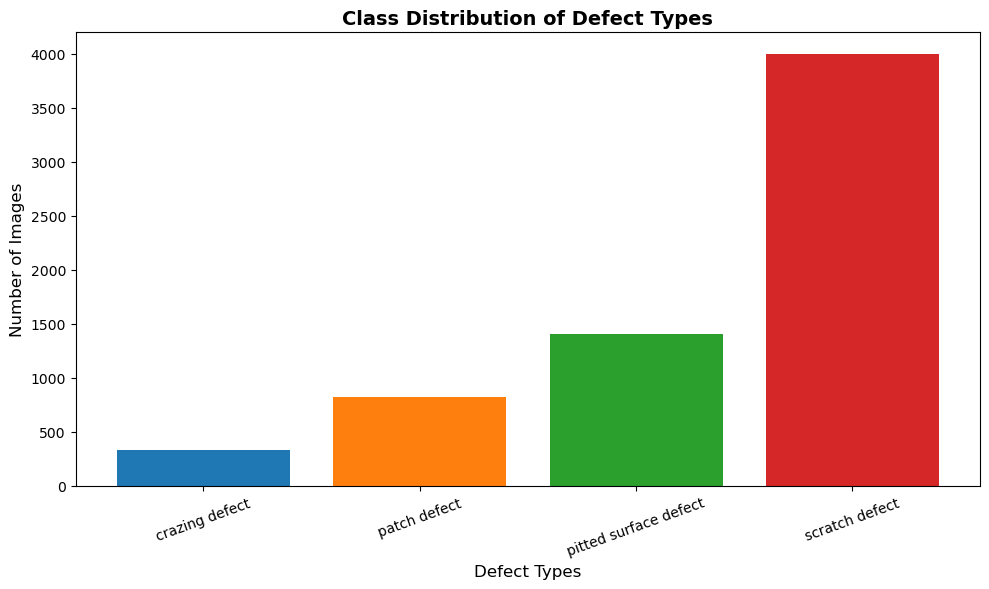

In [3]:
import os
import matplotlib.pyplot as plt

# Replace with your dataset path
dataset_path = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train'

# Get class-wise counts
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
class_counts = {}
for class_name in class_names:
    folder_path = os.path.join(dataset_path, class_name)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    class_counts[class_name] = count

# Colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Removed the label-drawing loop here

# Titles and labels
plt.title('Class Distribution of Defect Types', fontsize=14, fontweight='bold')
plt.xlabel('Defect Types', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


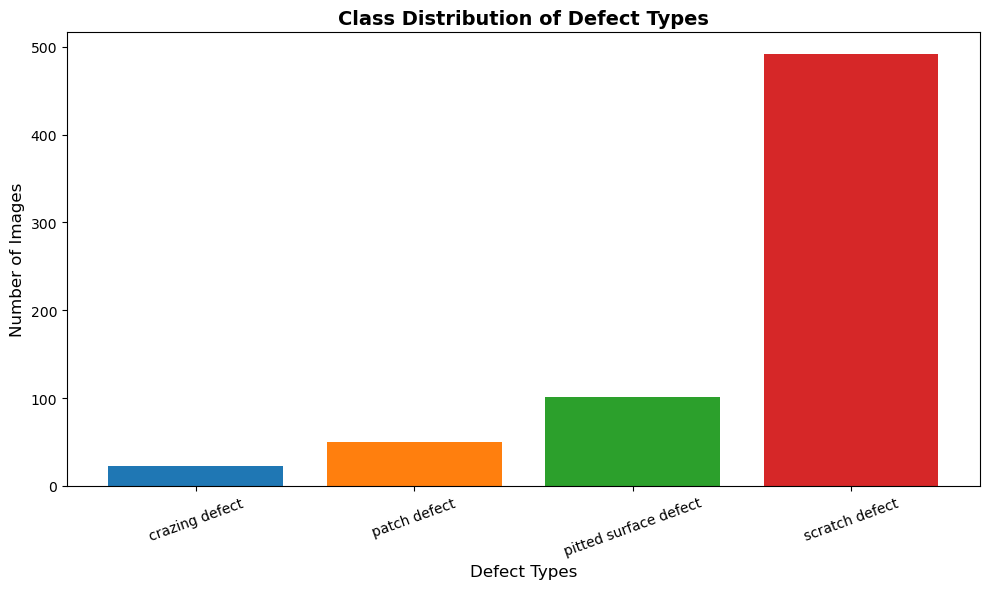

In [14]:
import os
import matplotlib.pyplot as plt

# Replace with your dataset path
dataset_path = r'C:\Users\anura\Desktop\Img_Pro\segmented_valid\train'

# Get class-wise counts
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
class_counts = {}
for class_name in class_names:
    folder_path = os.path.join(dataset_path, class_name)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    class_counts[class_name] = count

# Colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Removed the label-drawing loop here

# Titles and labels
plt.title('Class Distribution of Defect Types', fontsize=14, fontweight='bold')
plt.xlabel('Defect Types', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


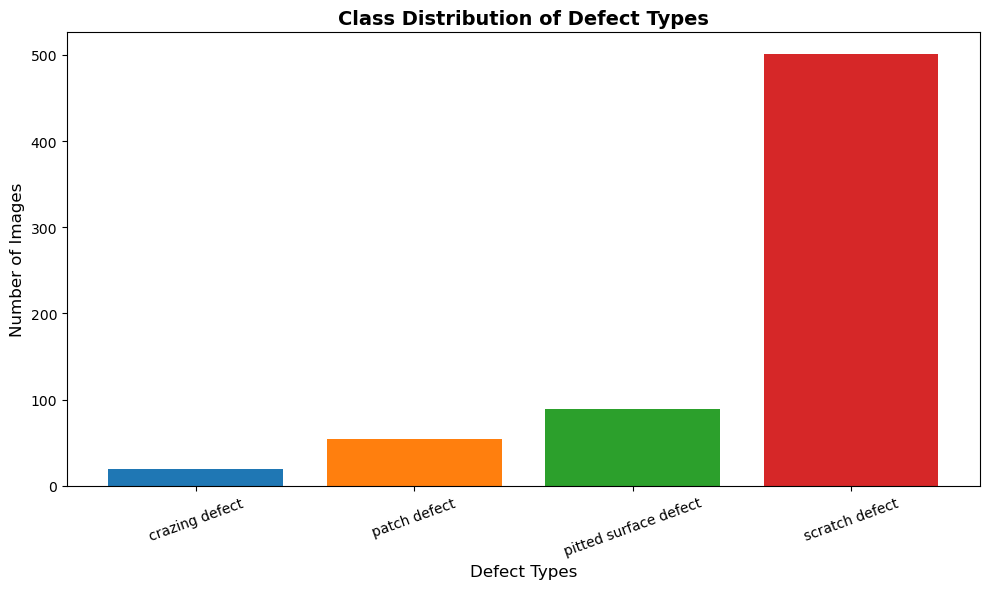

In [16]:
import os
import matplotlib.pyplot as plt

# Replace with your dataset path
dataset_path = r'C:\Users\anura\Desktop\Img_Pro\segmented_test\train'

# Get class-wise counts
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
class_counts = {}
for class_name in class_names:
    folder_path = os.path.join(dataset_path, class_name)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    class_counts[class_name] = count

# Colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Removed the label-drawing loop here

# Titles and labels
plt.title('Class Distribution of Defect Types', fontsize=14, fontweight='bold')
plt.xlabel('Defect Types', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [ ]:
import os
from collections import defaultdict

dataset_path = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train'
class_counts = defaultdict(int)

# Count images per class
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

print("Original class distribution:", dict(class_counts))

Original class distribution: {'crazing defect': 330, 'patch defect': 826, 'pitted surface defect': 1404, 'scratch defect': 4000}


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tqdm import tqdm
from uuid import uuid4

# Configuration
base_dir = r"C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train"
target_size = (128, 128)
target_count = 1700

# Only these classes need upsampling
class_counts = {
    "crazing defect": 330,
    "patch defect": 826,
    "pitted surface defect": 1404,
    "scratch defect": 4000  # Majority class
}

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Upsample each minority class
for class_name, original_count in class_counts.items():
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    current_count = len(images)
    
    if current_count >= target_count:
        continue  # Already balanced

    print(f"\nUpsampling '{class_name}' from {current_count} to {target_count} images...")

    img_index = 0
    pbar = tqdm(total=target_count - current_count)

    while len(os.listdir(class_dir)) < target_count:
        img_path = os.path.join(class_dir, images[img_index % len(images)])
        img = load_img(img_path, target_size=target_size)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        for batch in datagen.flow(x, batch_size=1):
            unique_name = f"aug_{uuid4().hex[:8]}.jpg"
            save_path = os.path.join(class_dir, unique_name)
            array = batch[0].astype('uint8')
            from tensorflow.keras.preprocessing.image import array_to_img
            array_to_img(array).save(save_path)

            pbar.update(1)
            break  # Save only one image per iteration

        img_index += 1

    pbar.close()

print("\n✅ All classes now have 1700 images (rechecked).")




Upsampling 'crazing defect' from 330 to 1700 images...


100%|██████████| 1370/1370 [00:37<00:00, 36.39it/s]



Upsampling 'patch defect' from 826 to 1700 images...


100%|██████████| 874/874 [00:25<00:00, 34.93it/s]



Upsampling 'pitted surface defect' from 1404 to 1700 images...


100%|██████████| 296/296 [00:08<00:00, 35.81it/s]


✅ All classes now have 4000 images (rechecked).


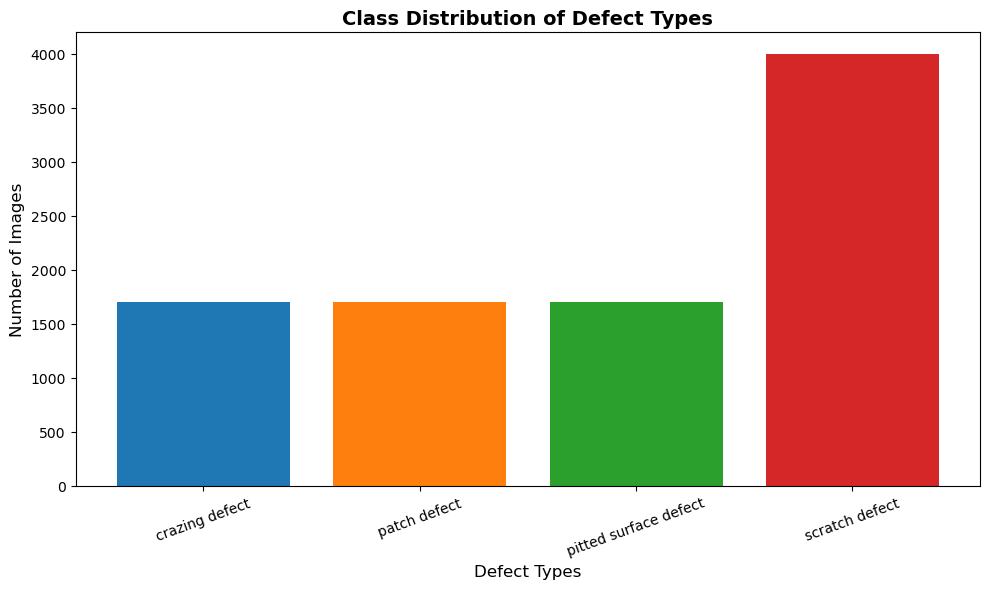

In [3]:
import os
import matplotlib.pyplot as plt

# Replace with your dataset path
dataset_path = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train'

# Get class-wise counts
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
class_counts = {}
for class_name in class_names:
    folder_path = os.path.join(dataset_path, class_name)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    class_counts[class_name] = count

# Colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Removed the label-drawing loop here

# Titles and labels
plt.title('Class Distribution of Defect Types', fontsize=14, fontweight='bold')
plt.xlabel('Defect Types', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [4]:
import random
import os

# Define the directory where the images are stored
image_directory = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train\scratch defect'

# Get the list of all image filenames in the directory
all_images = os.listdir(image_directory)

# Ensure there are at least 4000 images in the directory
if len(all_images) != 4000:
    print(f"Warning: Expected 4000 images, but found {len(all_images)} images.")
else:
    # Randomly select 2000 images to remove
    images_to_remove = random.sample(all_images, 2000)

    # Remove the selected images
    for image in images_to_remove:
        try:
            os.remove(os.path.join(image_directory, image))
            print(f"Removed: {image}")
        except Exception as e:
            print(f"Error removing {image}: {e}")

    print(f"Successfully removed 2000 random images.")


Removed: 7a1251b77_jpg.rf.ce1d135d993b0991e5c42390f94c767e.jpg
Removed: 9378a6f12_jpg.rf.b13aaa40cb1e7fa9029c6ec12e119e7a.jpg
Removed: 485ed6221_jpg.rf.4d3a03311c95d0a82bb69f8e1eaa4344.jpg
Removed: 25c940a74_jpg.rf.9d4093ad4626ca10173266bea6760816.jpg
Removed: aad347618_jpg.rf.84636c6681b6d678707525cff6ab18e2.jpg
Removed: f186527ee_jpg.rf.d5858a9b8ba39e661ed3a71a6476d654.jpg
Removed: fd2a53b9a_jpg.rf.c5260266e667346043e74fc5ad78ef6d.jpg
Removed: 2a84bb533_jpg.rf.b7928b58ec8fc1dbca3207716dc049b6.jpg
Removed: e89c99064_jpg.rf.d6e7efc3049ca4de6767d2289e6e40f1.jpg
Removed: f39c2310c_jpg.rf.35ffc5c3715f4cc04fd8c902486d9608.jpg
Removed: 9958480e2_jpg.rf.8cb5132067a76c4c1e79668f959be6b2.jpg
Removed: 27b1670da_jpg.rf.a25aa442831ce286744d760041312c69.jpg
Removed: 2cf487578_jpg.rf.3fdfa9aeed41a0f19c82209395c5b319.jpg
Removed: 4cc6b09fd_jpg.rf.ef22a41c292c25cae9250417a6e98bbd.jpg
Removed: ef8c8a263_jpg.rf.d2346ec03ae3dfadf501c43ed8065c4a.jpg
Removed: 810f96801_jpg.rf.19670507928c1b5e9f2e65a68c4c5

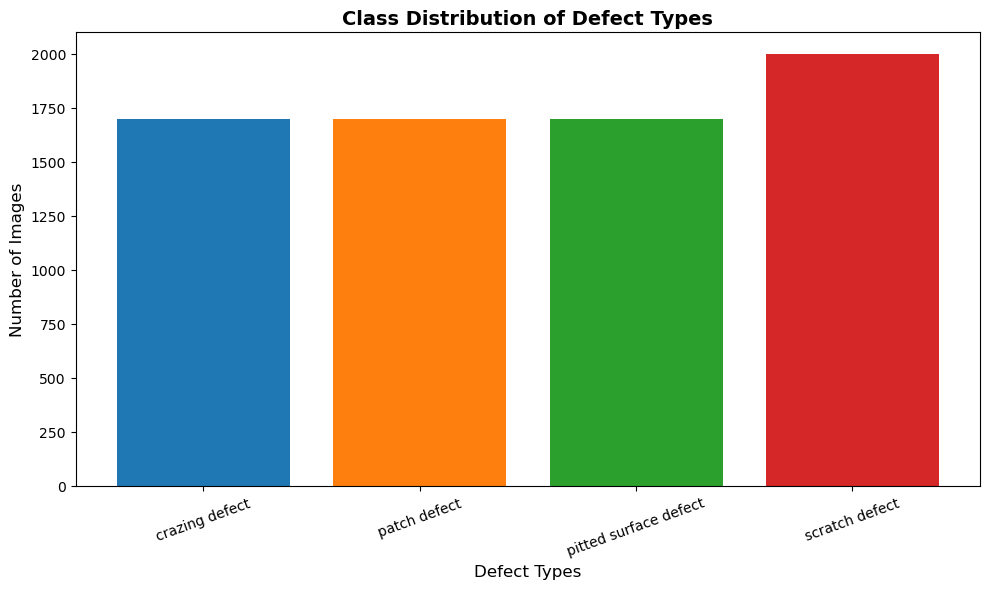

In [5]:
import os
import matplotlib.pyplot as plt

# Replace with your dataset path
dataset_path = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train'

# Get class-wise counts
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
class_counts = {}
for class_name in class_names:
    folder_path = os.path.join(dataset_path, class_name)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    class_counts[class_name] = count

# Colors for bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Removed the label-drawing loop here

# Titles and labels
plt.title('Class Distribution of Defect Types', fontsize=14, fontweight='bold')
plt.xlabel('Defect Types', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Configuration
train_dir = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train'
val_dir = r'C:\Users\anura\Desktop\Img_Pro\valid_sorted'
img_size = (224, 224)
batch_size = 64
num_classes = 4
epochs = 3  # Set low for testing

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

# Final evaluation
val_loss, val_acc = model.evaluate(val_generator)
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

# Save final model
model.save('final_segmented_model.keras')
print("Model saved as 'final_segmented_model.keras'")


Found 7100 images belonging to 4 classes.
Found 666 images belonging to 4 classes.


c:\Users\anura\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\anura\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.5832 - loss: 1.2155 - val_accuracy: 0.2203 - val_loss: 2.2712 - learning_rate: 0.0010
Epoch 2/3
  1/110 ━━━━━━━━━━━━━━━━━━━━ 4:37 3s/step - accuracy: 0.6875 - loss: 0.7525

c:\Users\anura\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6875 - loss: 0.7525 - val_accuracy: 0.0359 - val_loss: 8.0106 - learning_rate: 0.0010
Epoch 3/3
  6/110 ━━━━━━━━━━━━━━━━━━━━ 4:26 3s/step - accuracy: 0.7003 - loss: 0.8307

KeyboardInterrupt: 

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Configuration
train_dir = r'C:\Users\anura\Desktop\Img_Pro\segmented_dataset\train'
val_dir = r'C:\Users\anura\Desktop\Img_Pro\segmented_valid\train'
img_size = (224, 224)
batch_size = 64
num_classes = 4
epochs = 3  # Set low for testing

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

# Final evaluation
val_loss, val_acc = model.evaluate(val_generator)
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

# Save final model
model.save('final_segmented_model.keras')
print("Model saved as 'final_segmented_model.keras'")


Found 7100 images belonging to 4 classes.
Found 666 images belonging to 4 classes.
Epoch 1/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.6021 - loss: 1.2076 - val_accuracy: 0.1578 - val_loss: 28.3537 - learning_rate: 0.0010
Epoch 2/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7031 - loss: 0.7639 - val_accuracy: 0.1578 - val_loss: 27.3539 - learning_rate: 0.0010
Epoch 3/3
  3/110 ━━━━━━━━━━━━━━━━━━━━ 4:37 3s/step - accuracy: 0.7153 - loss: 0.7387

KeyboardInterrupt: 